In [54]:
# import the liberaries
import pandas as pd # for computation and analysis of data
import numpy as np # for numerical computation
import matplotlib.pyplot as plt # for visualization
import seaborn as sns # for visualization also
import warnings
warnings.filterwarnings('ignore')

# import Machine Learning Liberaries
from sklearn.preprocessing import LabelEncoder # for converting categorical data into numeric
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report # evaluation metrics

In [55]:
# load the dataset using pandas 
df = pd.read_csv('Titanic-Dataset.csv')

In [56]:
# Let's see how the data looks like
df.head(5) # used to  show top rows of the dataset 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Observations
1. This dataset consists of 891 rows and 12 columns.
2. We can see that there are missing values in the dataset.
3. We can see that there are 2 float, 5 int and 5 object data type columns in the dataset.
4. We can see the column names and each data type of that column.

In [58]:
df.shape

(891, 12)

In [59]:
# Let's see missing values in the dataset
df.isnull().sum().sort_values(ascending = False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [60]:
# Let's see the percentage of missing values in the dataset upto 2 decimal points
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

Cabin          77.10
Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

### Observations
1. Cabin Column contain 77.10% missing values.
2. Age Column contains 19.87% of the missing values.
3. Embarked contains 0.22% of missing values. 

<Axes: >

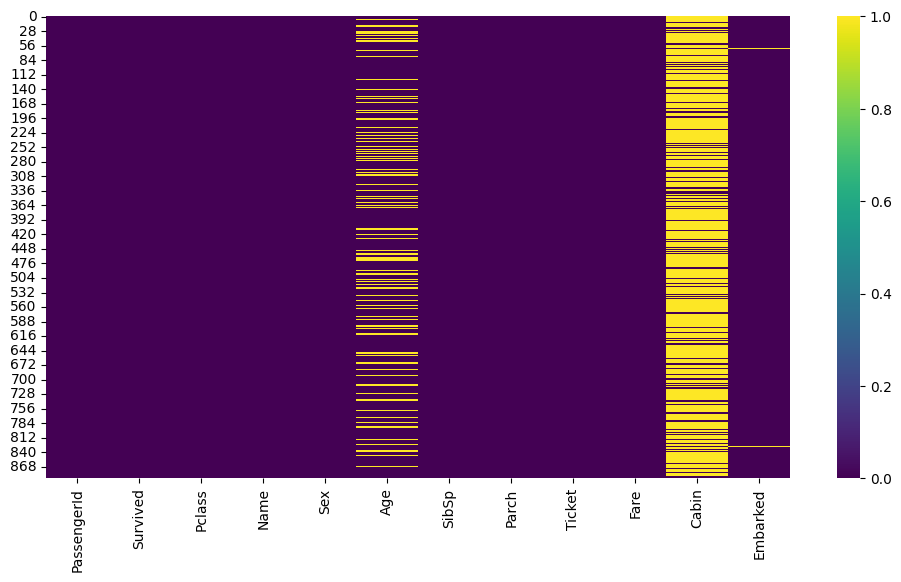

In [61]:
# Let's see missing values in a plot
plt.figure(figsize = (12, 6))
sns.heatmap(df.isnull(), cmap = 'viridis', cbar = True)

- Here, yellow lines show missing values in the dataset corresponding to each column.

In [62]:
# Let's remove Cabin Column because it has 77.10% missing values
df.drop(['Cabin'], axis = 1, inplace = True)

In [63]:
round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)

Age            19.87
Embarked        0.22
PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
dtype: float64

In [64]:
# Now, let's fill the missing values in the Age Column with median 
df['Age'] = df['Age'].fillna(df['Age'].median())

In [65]:
df.isnull().sum().sort_values(ascending = False)

Embarked       2
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
dtype: int64

In [66]:
# Since Embarked is categorical column so fill this column with mode value
df.fillna(df['Embarked'].mode()[0], inplace = True)

In [67]:
df.isnull().sum().sort_values(ascending = False)

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

<Axes: >

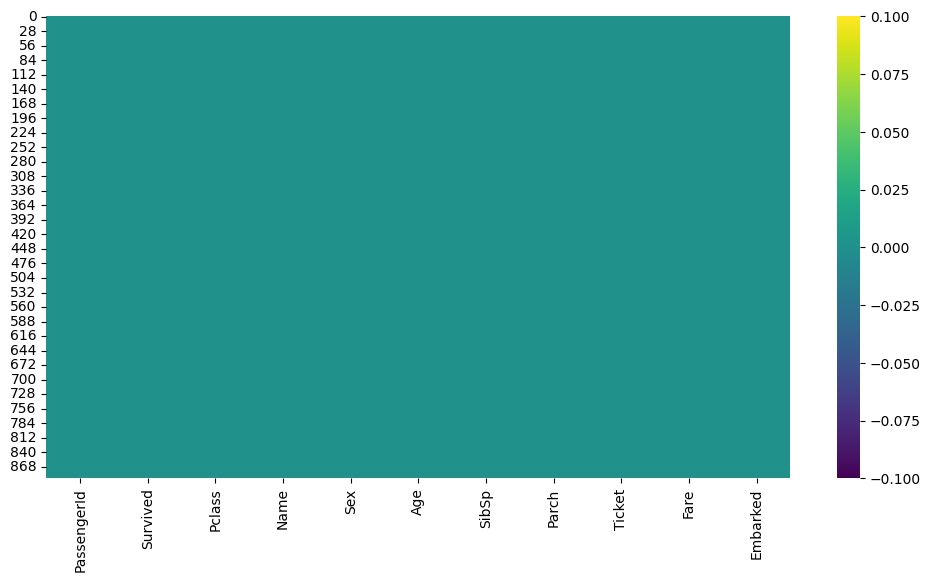

In [68]:
plt.figure(figsize = (12, 6))
sns.heatmap(df.isnull(), cmap = 'viridis', cbar = True)

- Utill here we have no missing values in the dataset.

In [69]:
# Mow, let's check for duplicated rows in the data
df.duplicated().sum()

0

### Observations
1. No duplicated rows in the dataset.

In [70]:
# Insights from the data
df.sample(3) # takes any random 3 rows from the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
783,784,0,3,"Johnston, Mr. Andrew G",male,28.0,1,2,W./C. 6607,23.4500,S
503,504,0,3,"Laitinen, Miss. Kristina Sofia",female,37.0,0,0,4135,9.5875,S
706,707,1,2,"Kelly, Mrs. Florence ""Fannie""",female,45.0,0,0,223596,13.5000,S


In [71]:
# Let's see how many passengers survived 
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [72]:
# Let's see how many perecnt passengers survived 
df['Survived'].value_counts() / len(df) * 100

Survived
0    61.616162
1    38.383838
Name: count, dtype: float64

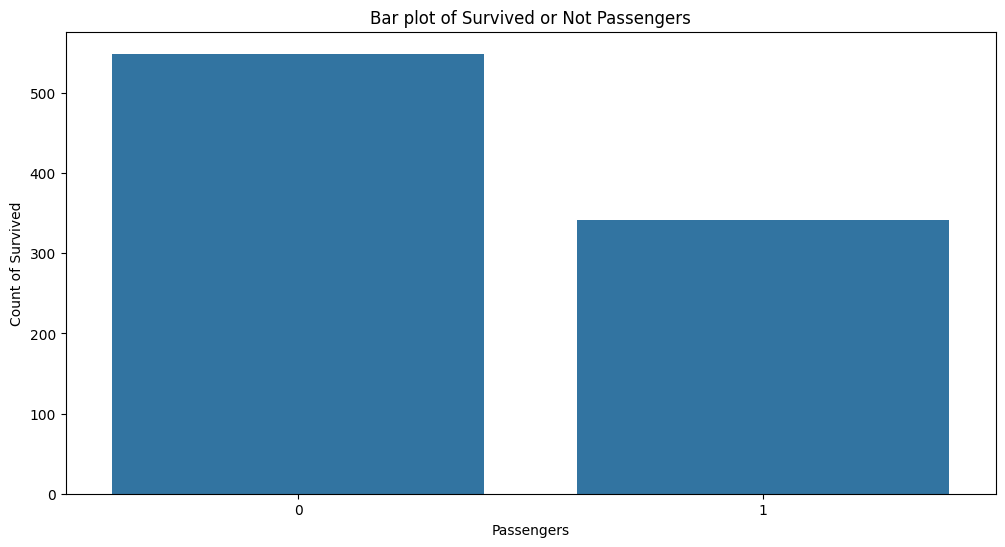

In [73]:
plt.figure(figsize = (12, 6))
sns.barplot(df['Survived'].value_counts())
plt.xlabel('Passengers')
plt.ylabel('Count of Survived')
plt.title('Bar plot of Survived or Not Passengers')
plt.show()

### Observations
1. 61.6% passengers Not survived.
2. 38.4% passengers only survived in the titanic.

In [74]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
346,347,1,2,"Smith, Miss. Marion Elsie",female,40.0,0,0,31418,13.00,S
89,90,0,3,"Celotti, Mr. Francesco",male,24.0,0,0,343275,8.05,S
153,154,0,3,"van Billiard, Mr. Austin Blyler",male,40.5,0,2,A/5. 851,14.50,S


In [75]:
# Let's see the percentage of male and female in survived column
round(df.groupby('Sex')['Survived'].value_counts() / len(df) * 100, 2)

Sex     Survived
female  1           26.15
        0            9.09
male    0           52.53
        1           12.23
Name: count, dtype: float64

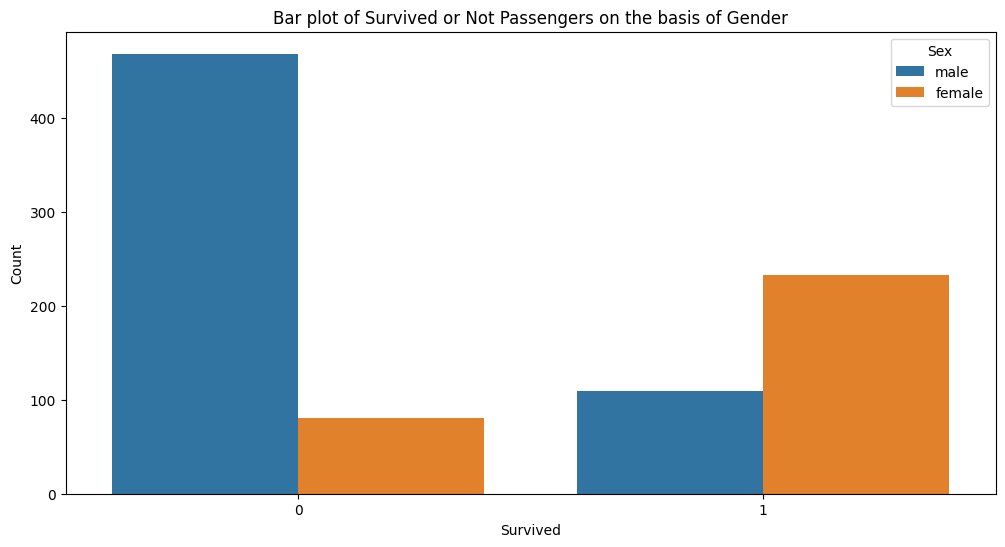

In [76]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Survived', hue='Sex', data=df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of Survived or Not Passengers on the basis of Gender')
plt.show()

### Obsevvations 
1. 26.15% female and 12.23% male survived.
2. 52.53% female and 9.89% male did not survive.

In [77]:
df.sample(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
581,582,1,1,"Thayer, Mrs. John Borland (Marian Longstreth M...",female,39.0,1,1,17421,110.8833,C
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,C
301,302,1,3,"McCoy, Mr. Bernard",male,28.0,2,0,367226,23.2500,Q


In [78]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [79]:
# Let's see the correlation of survived, pclass, age, sibsp, parch and fare
df[['Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']].corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.064910,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.339898,0.083081,0.018443,-0.549500
Age,-0.064910,-0.339898,1.000000,-0.233296,-0.172482,0.096688
SibSp,-0.035322,0.083081,-0.233296,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.172482,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096688,0.159651,0.216225,1.000000


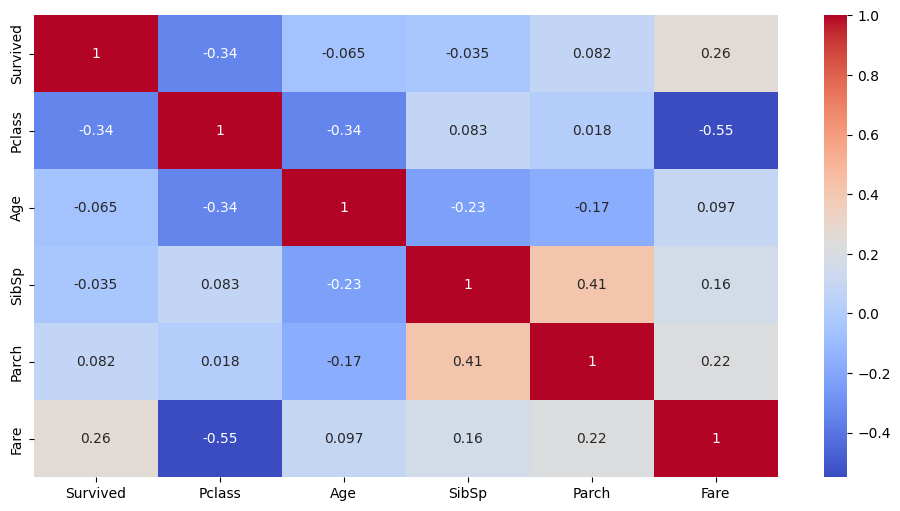

In [80]:
plt.figure(figsize = (12, 6))
sns.heatmap(df[['Survived', 'Pclass', 'Age', 'SibSp','Parch', 'Fare']].corr(), annot = True, cbar = True, cmap = 'coolwarm')
plt.show()

In [81]:
# Let's check survival rate on pclass
df.groupby('Pclass')['Survived'].value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: count, dtype: int64

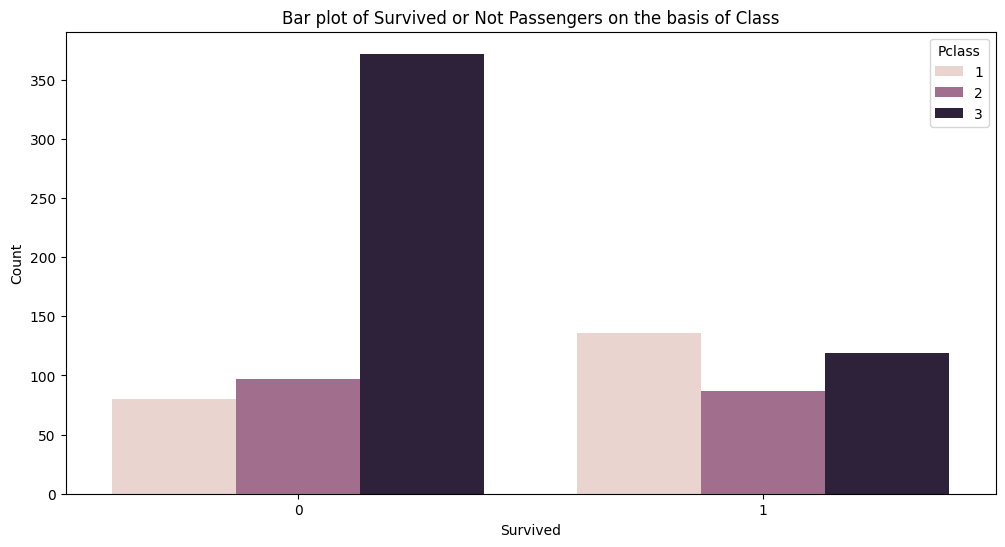

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'Survived', hue = 'Pclass', data = df)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Bar plot of Survived or Not Passengers on the basis of Class')
plt.show()

In [83]:
df.tail() # shows the last 5 rows of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.45,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,Q


### Now, Let's build a model that predict the `survival` on the basis of `plcass, sex, age, sibsp, parch, fare and embarked`

In [84]:
# Let'd drop unnecessary columns
df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1, inplace = True)

In [85]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [87]:
# Let's encode the object type columns into numerical dtype uisng for loop
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = LabelEncoder().fit_transform(df[col])

In [88]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int32  
dtypes: float64(2), int32(2), int64(4)
memory usage: 48.9 KB


In [90]:
# Choose features (X) and labels (y)
X = df.drop('Survived', axis = 1)
y = df['Survived']

In [91]:
# divide the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 42)

In [92]:
# call the model
model = LogisticRegression()

In [93]:
# train the model
model.fit(X_train, y_train)

LogisticRegression()

In [94]:
# predict the model
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1], dtype=int64)

In [95]:
# evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy Score: {accuracy}")
print(f"Confusion Matrix:\n {conf_matrix}")
print(f"Classification Report:\n {class_report}")

Accuracy Score: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



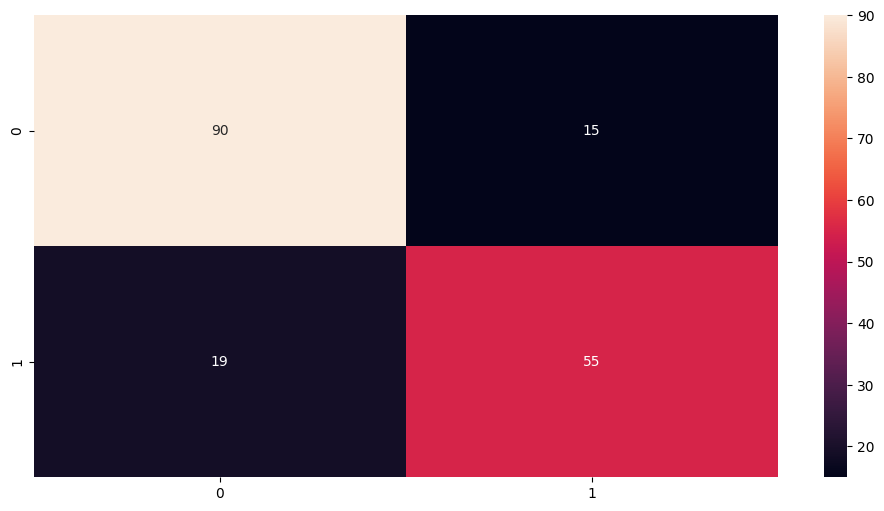

In [96]:
# Let's check heatmap of confusion matrix
plt.figure(figsize = (12, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True)
plt.show()

### Save the model

In [97]:
import pickle
pickle.dump(model, open('titanic_model.pkl', 'wb'))

### Load the model

In [98]:
pickle.load(open('titanic_model.pkl', 'rb'))

LogisticRegression()

### Now, Let's predict the `survival` on the basis of `plcass, sex, age, sibsp, parch, fare and embarked` for unseen value

In [99]:
model.predict([[1, 0, 27, 2, 0, 45, 2]])

array([1], dtype=int64)

- According to the given features the passenger survived in titanic.